In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.2.0'

In [3]:
# Parameters.
learning_rate = 0.1
training_steps = 1000
display_step = 100
n_samples = 50

In [4]:
X = np.random.rand(n_samples).astype(np.float32)
Y = X * 10 + 5

In [5]:
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

In [6]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / ( n_samples)

In [7]:
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [8]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [9]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 100, loss: 0.273562, W: 7.992661, b: 5.894854
step: 200, loss: 0.028027, W: 9.357490, b: 5.286426
step: 300, loss: 0.002871, W: 9.794346, b: 5.091679
step: 400, loss: 0.000294, W: 9.934175, b: 5.029345
step: 500, loss: 0.000030, W: 9.978930, b: 5.009393
step: 600, loss: 0.000003, W: 9.993257, b: 5.003006
step: 700, loss: 0.000000, W: 9.997839, b: 5.000963
step: 800, loss: 0.000000, W: 9.999307, b: 5.000309
step: 900, loss: 0.000000, W: 9.999775, b: 5.000101
step: 1000, loss: 0.000000, W: 9.999922, b: 5.000034


In [10]:
import matplotlib.pyplot as plt

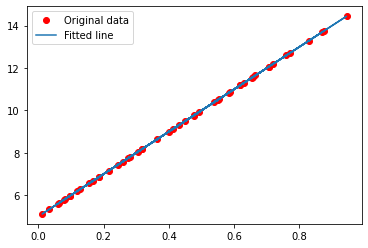

In [11]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()